# **Data Visualization Notebook**

## Objectives

The main objective of this notebook is to address Business Requirement 1, which involves visually differentiating between healthy cherry leaves and those affected by powdery mildew. This will be achieved through a series of visualizations and image processing techniques, including:

1. **Image Shape Analysis**: Determine the average shape and dimensions of the images in the dataset.
2. **Mean and Variability Analysis**: Calculate and visualize the mean and standard deviation of pixel intensities for each class (healthy vs. powdery mildew).
3. **Contrast Analysis**: Create visualizations that highlight the differences between the two classes, such as difference images or heatmaps.
4. **Image Montage**: Generate montages of images from each class to provide a visual overview and assist in visual inspection, particularly for dashboard integration.

## Inputs

- **Dataset**:
    - **Train Set**: `inputs/cherry-leaves_dataset/cherry-leaves/train`
    - **Validation Set**: `inputs/cherry-leaves_dataset/cherry-leaves/validation`
    - **Test Set**: `inputs/cherry-leaves_dataset/cherry-leaves/test`

## Outputs

- **Image Shape Embeddings**: Serialized embeddings (Pickle file) that contain the average image shape for further analysis.
- **Mean and Variability Plots**: Visualizations showing the mean and variability (standard deviation) of image pixel intensities per class.
- **Contrast Plot**: A side-by-side comparison or heatmap to highlight visual differences between healthy and powdery mildew-affected images.
- **Image Montage**: A montage of images for each class, designed for integration into a Streamlit dashboard.


## Additional Comments
 



---

# Set Data Directory

## Import libraries

In this section, we import several libraries that are essential for data manipulation, visualization, and image processing. Below are some links to the official documentation for each library:

- [NumPy Documentation](https://numpy.org/doc/stable/): For numerical operations and array handling.
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/): For data manipulation and analysis.
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html): For creating static, animated, and interactive visualizations in Python.
- [Seaborn Documentation](https://seaborn.pydata.org/): For statistical data visualization based on Matplotlib.
- [Keras Documentation (Image Preprocessing)](https://keras.io/api/preprocessing/image/): For loading, resizing, and normalizing images.
- [Joblib Documentation](https://joblib.readthedocs.io/en/latest/): For efficient serialization and parallel computing.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread
from PIL import Image

## Import packages

In [3]:
import numpy
import os

## Set working directory

In [4]:
cwd= os.getcwd()

In [5]:
os.chdir('/workspace/rare-and-sweet')
print("You set a new current directory")

You set a new current directory


In [6]:
work_dir = os.getcwd()
work_dir

'/workspace/rare-and-sweet'

## Set input directories

In [7]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [8]:
# Define the version and work directory
version = 'v1'
work_dir = '.'  
file_path = f'outputs/{version}'

# Check if 'outputs' directory and the specific version directory exist
if 'outputs' in os.listdir(work_dir) and version in os.listdir(os.path.join(work_dir, 'outputs')):
    print(f"Version '{version}' already exists. Consider creating a new version.")
else:
    # Create the directory if it doesn't exist
    os.makedirs(name=file_path)
    print(f"Directory '{file_path}' created for version '{version}'.")

Version 'v1' already exists. Consider creating a new version.


In [9]:
train_path = 'inputs/cherry-leaves_dataset/cherry-leaves/train'

# Set the labels by listing the subdirectory names
labels = os.listdir(train_path)

# Print the labels
print('Labels for the images are:', labels)

Labels for the images are: ['healthy', 'powdery_mildew']


---

# Section 1

## Data visualisation of image data

**Image shape**

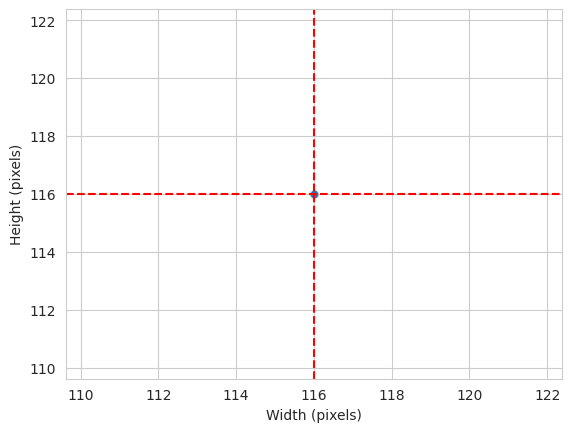

Width average: 116 
Height average: 116


In [10]:
from PIL import Image  # Import the Python Imaging Library (PIL) to handle image operations

# Define the target dimensions to which each image will be resized
target_dim = (116, 116)

# Initialize lists to store the dimensions of each resized image
dim1, dim2 = [], []

# Iterate through each label (class) in the dataset
for label in labels:
    # Iterate through each image file within the current label directory
    for image_filename in os.listdir(train_path + '/' + label):
        # Open the image using PIL's Image.open
        img = Image.open(train_path + '/' + label + '/' + image_filename)
        
        # Resize the image to the target dimensions using LANCZOS filter for high-quality downsampling
        img_resized = img.resize(target_dim, Image.LANCZOS)
        
        # Get the dimensions of the resized image (width and height)
        d1, d2 = img_resized.size
        
        # Append the dimensions to their respective lists (dim1 for height, dim2 for width)
        dim1.append(d1)  # image width
        dim2.append(d2)  # image height

# Set the style of the seaborn plot to 'whitegrid'
sns.set_style("whitegrid")

# Create a new figure and axes for the plot
fig, axes = plt.subplots()

# Create a scatter plot to visualize the distribution of resized image dimensions
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)

# Set the labels for the axes
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")

# Calculate the mean dimensions for both width and height
dim1_mean = int(np.array(dim1).mean())  # Mean width of resized images
dim2_mean = int(np.array(dim2).mean())  # Mean height of resized images

# Add vertical and horizontal dashed lines to the plot to indicate the mean dimensions
axes.axvline(x=dim1_mean, color='r', linestyle='--')  # Vertical line for mean width
axes.axhline(y=dim2_mean, color='r', linestyle='--')  # Horizontal line for mean height

# Display the plot
plt.show()

# Print the average dimensions of the resized images
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")






In [11]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(116, 116, 3)

In [12]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

## Mean and Variability of Images Per Label Plot

In this section, we use Matplotlib and Seaborn to visualize the dimensions and variability of images in the dataset. These libraries provide powerful tools for creating informative visualizations.

- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)


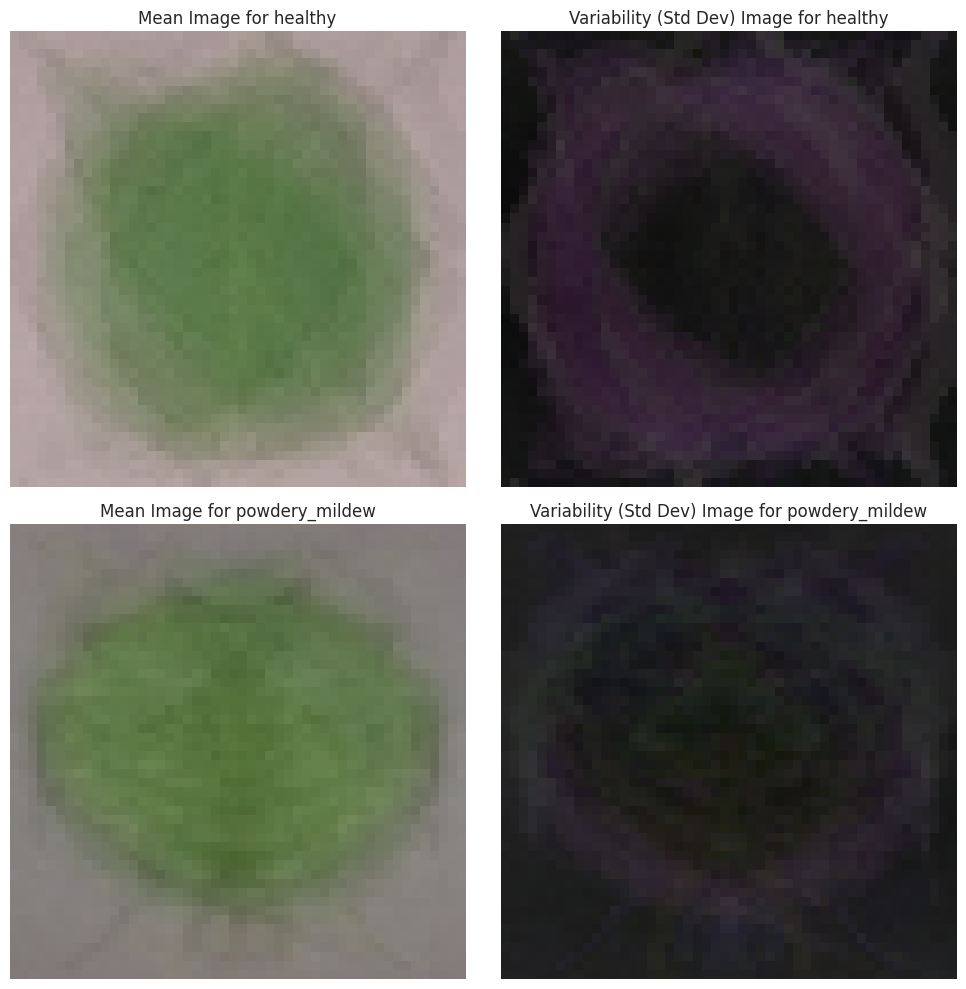

In [13]:
from tensorflow.keras.preprocessing import image

# Define the function to load images as arrays
# The `image.load_img` function is used to load images with a specified target size.
# More details at: https://keras.io/api/preprocessing/image/#load_img-function
def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=100):
    
    # Initialize empty arrays for image data and labels
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    # Loop through each label (class)
    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # Load a limited number of images to manage time and memory
            if counter < n_images_per_label:
                
                img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                
                # The `image.img_to_array` function converts the image to a numpy array.
                # If the max pixel value is greater than 1, normalize by dividing by 255.
                if image.img_to_array(img).max() > 1: 
                    img_resized = image.img_to_array(img) / 255
                else: 
                    img_resized = image.img_to_array(img)
                
                # Append image data and labels to the arrays
                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

# Function to load the images and labels
X, y = load_image_as_array(my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves/train', new_size=(50, 50), n_images_per_label=20)

# Convert y to a NumPy array (this line is mostly redundant now since y is already a NumPy array)
y = np.array(y)

# Get unique labels
labels = np.unique(y)

# Initialize dictionaries to store mean and std images
mean_images = {}
std_images = {}

# Calculate mean and std images for each label
for label in labels:
    label_images = X[y == label]  # Select images corresponding to the current label
    mean_images[label] = np.mean(label_images, axis=0)
    std_images[label] = np.std(label_images, axis=0)

# Plotting the mean and std images using Matplotlib and Seaborn.
# Learn more about Matplotlib: https://matplotlib.org/stable/contents.html
# Learn more about Seaborn: https://seaborn.pydata.org/
fig, axes = plt.subplots(len(labels), 2, figsize=(10, 5 * len(labels)))

for i, label in enumerate(labels):
    # Plot the mean image
    axes[i, 0].imshow(mean_images[label], cmap='gray')
    axes[i, 0].set_title(f'Mean Image for {label}')
    axes[i, 0].axis('off')
    
    # Plot the variability (standard deviation) image
    axes[i, 1].imshow(std_images[label], cmap='gray')
    axes[i, 1].set_title(f'Variability (Std Dev) Image for {label}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()




**Load image shape and labels in array**

In [14]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                          n_images_per_label = 30)
print(X.shape, y.shape)

(60, 116, 116, 3) (60,)


**Plot and save mean and variability of images per label**

In [15]:
def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
  """
   The pseudo code for the function is:
  * Loop in all labels
  * Subset an array for given label
  * Calculate mean and standard deviation
  * Create a figure displaying mean and variability of images
  * Save image

  """

  for label_to_display in np.unique(y):
    sns.set_style("white")

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Variability image for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')

    if save_image:
      plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()
      print("\n")

==== Label healthy ====
Image Shape: (116, 116, 3)
==== Label powdery_mildew ====
Image Shape: (116, 116, 3)


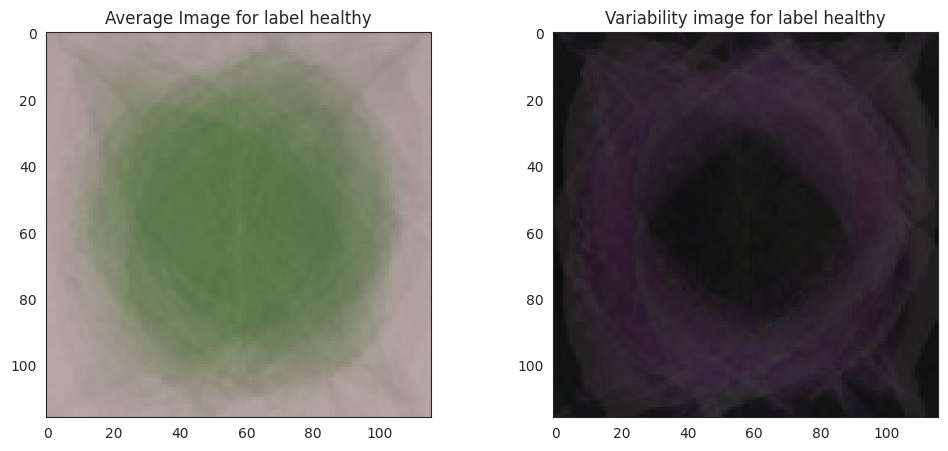

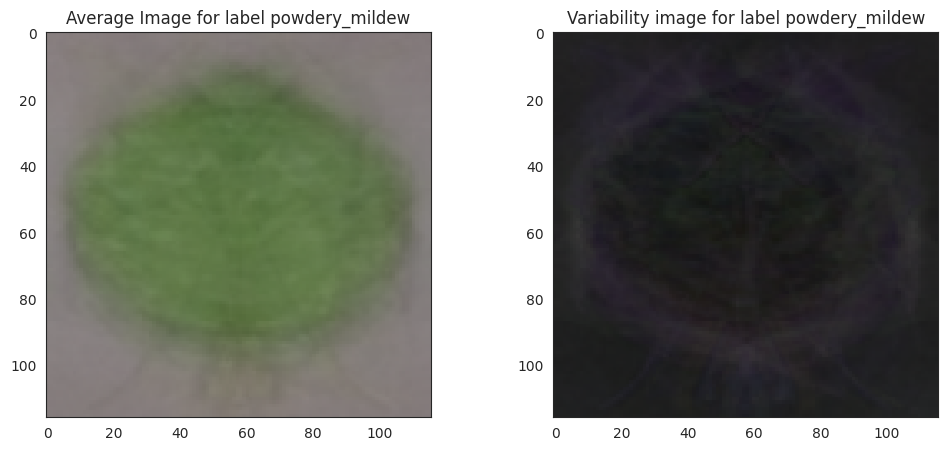

In [16]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5),save_image=True)

## Distinguish Contrast Between Healthy and Powdery Mildew-Affected Cherry Leaf Images

In [17]:
def subset_image_label(X, y, label_to_display):
    boolean_mask = (y == label_to_display)
    df = X[boolean_mask]
    return df

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False, file_path=None):
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label_1} or label {label_2} is not in {np.unique(y)}")
        return

    # Calculate the mean image for label_1
    images_label_1 = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label_1, axis=0)

    # Calculate the mean image for label_2
    images_label_2 = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label_2, axis=0)

    # Calculate the absolute difference between the mean images
    difference_mean = np.abs(label1_avg - label2_avg)

    # Normalize the images to the [0, 255] range for better visualization
    label1_avg_normalized = (label1_avg - label1_avg.min()) / (label1_avg.max() - label1_avg.min()) * 255
    label2_avg_normalized = (label2_avg - label2_avg.min()) / (label2_avg.max() - label2_avg.min()) * 255
    difference_mean_normalized = (difference_mean - difference_mean.min()) / (difference_mean.max() - difference_mean.min()) * 255

    # Plot the average images and their difference
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg_normalized.astype(np.uint8), cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg_normalized.astype(np.uint8), cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean_normalized.astype(np.uint8), cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')

    # Save or show the plot
    if save_image:
        if file_path is not None:
            plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
        else:
            print("File path not provided. The image will not be saved.")
    else:
        plt.tight_layout()
        plt.show()




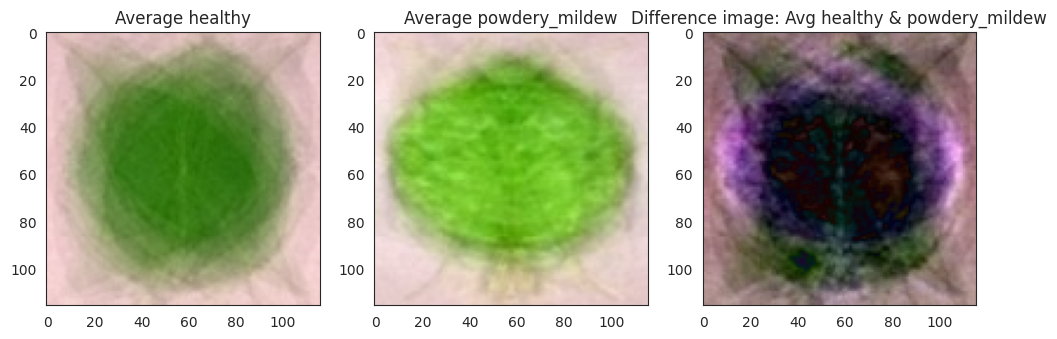

In [18]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy', label_2='powdery_mildew',
                                        figsize=(12, 10),
                                        save_image=True,
                                        file_path='outputs')



**Image Montage**

In [19]:
import random
import itertools

sns.set_style("white")

def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
   
    """
    Create a montage of images for a given label.
    
    :param dir_path: Directory where the images are stored.
    :param label_to_display: The label/class to display in the montage.
    :param nrows: Number of rows in the montage.
    :param ncols: Number of columns in the montage.
    :param figsize: Size of the figure (width, height).
    """
    labels = os.listdir(dir_path)

    # Check if the label exists
    if label_to_display in labels:
        images_list = os.listdir(os.path.join(dir_path, label_to_display))

        # If more spaces are requested than images available
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} images in your subset. "
                f"You requested a montage with {nrows * ncols} spaces."
            )
            return

        # Create list of axes indices based on nrows and ncols
        plot_idx = list(itertools.product(range(nrows), range(ncols)))

        # Create a Figure and display images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for i in range(nrows * ncols):
            img_path = os.path.join(dir_path, label_to_display, img_idx[i])
            img = imread(img_path)
            img_shape = img.shape
            axes[plot_idx[i][0], plot_idx[i][1]].imshow(img)
            axes[plot_idx[i][0], plot_idx[i][1]].set_title(f"{img_shape[1]}px x {img_shape[0]}px")
            axes[plot_idx[i][0], plot_idx[i][1]].axis('off')

        plt.tight_layout()

        # If using in Streamlit, use st.pyplot(fig) instead of plt.show()
        # st.pyplot(fig)  
        plt.show()  

    else:
        print(f"The label '{label_to_display}' doesn't exist.")
        print(f"The existing options are: {labels}")

# Example usage
train_path = 'inputs/cherry-leaves_dataset/cherry-leaves/train'




In [20]:
def resize_images(directory, target_size=(116, 116)):
    """
    Resize all images in the specified directory to the target size.

    Args:
    directory (str): Path to the directory containing subdirectories of images.
    target_size (tuple): Desired image size in (width, height).
    """
    labels = os.listdir(directory)
    for label in labels:
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):  # Check if it is a directory
            for image_file in os.listdir(label_path):
                img_path = os.path.join(label_path, image_file)
                with Image.open(img_path) as img:
                    # Resize image to target size
                    img = img.resize(target_size)
                    # Save the resized image
                    img.save(img_path)

# Example usage
resize_images('inputs/cherry-leaves_dataset/cherry-leaves/test')
resize_images('inputs/cherry-leaves_dataset/cherry-leaves/train')
resize_images('inputs/cherry-leaves_dataset/cherry-leaves/validation')

In [21]:
# Check image sizes before passing them to montage
for label in labels:
    label_path = os.path.join(train_path, label)
    for image_file in os.listdir(label_path):
        img_path = os.path.join(label_path, image_file)
        img = Image.open(img_path)
        assert img.size == (116, 116), f"Image {img_path} is not 116x116 but {img.size}"


healthy


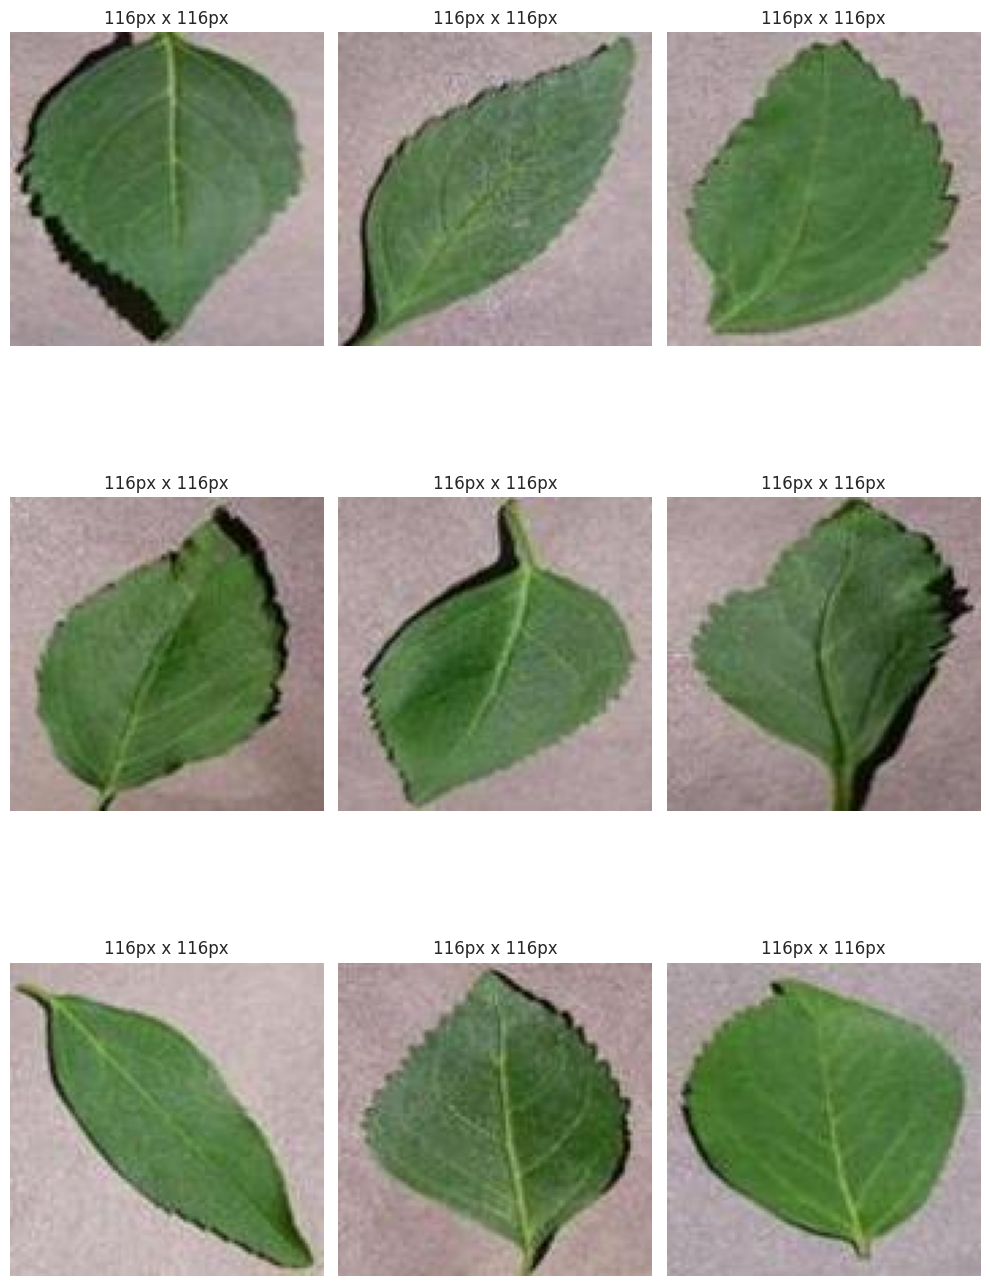



powdery_mildew


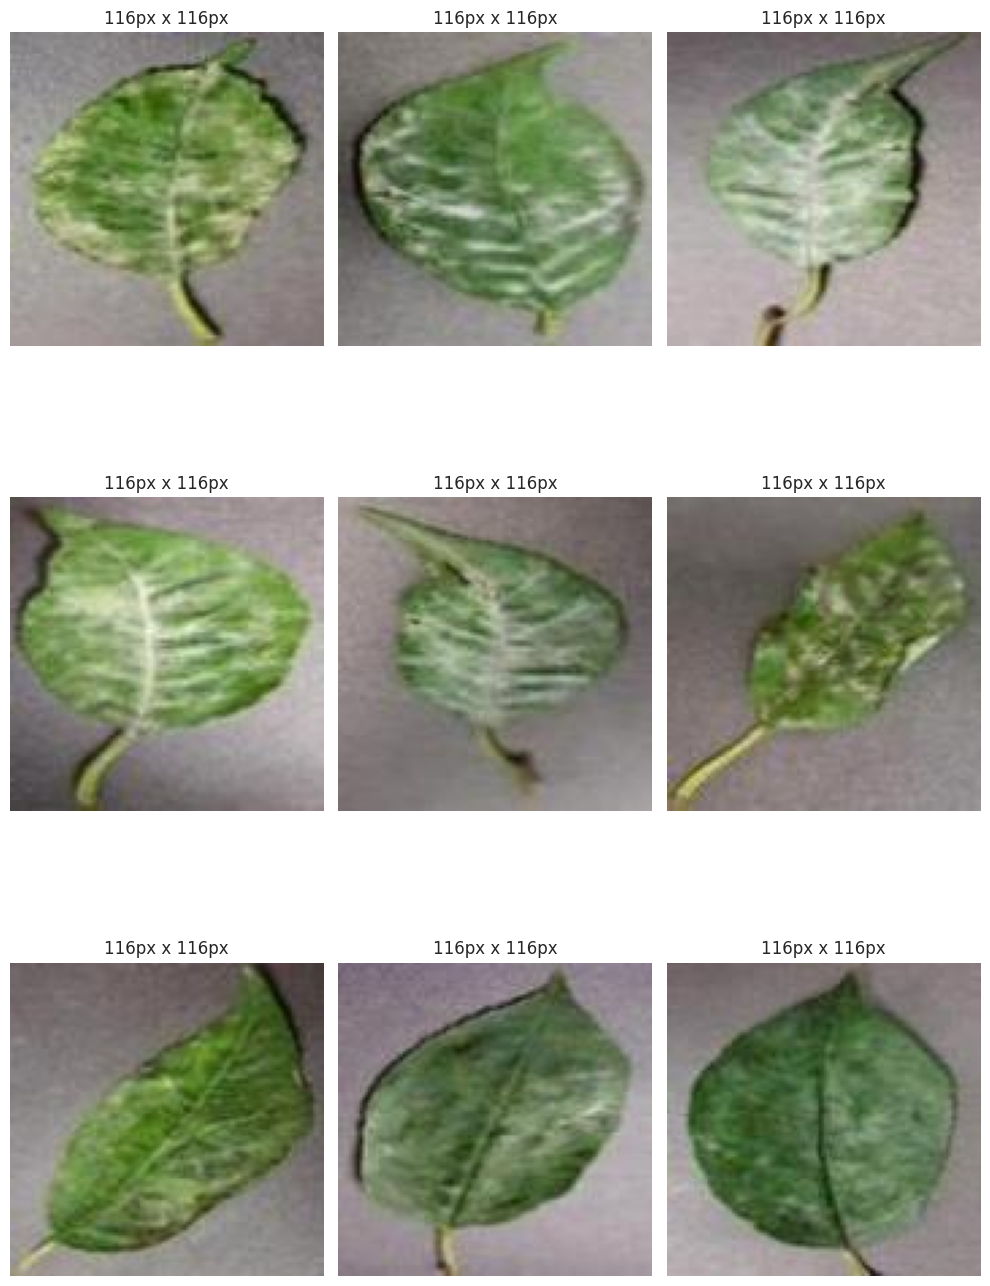

In [22]:
# Iterate over labels and create montage for each
labels = os.listdir(train_path)
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15))
    print("\n")

---